# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Wholesale_Data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [3]:
# Statistical summary
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
medians = df.median()
print("Medians for each column:")
print(medians)

Medians for each column:
Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64


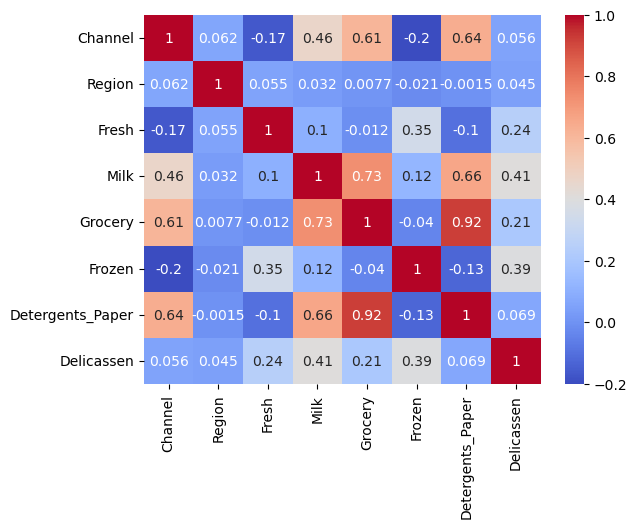

In [5]:
# Correlation matrix to get an overview of feature relationships
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

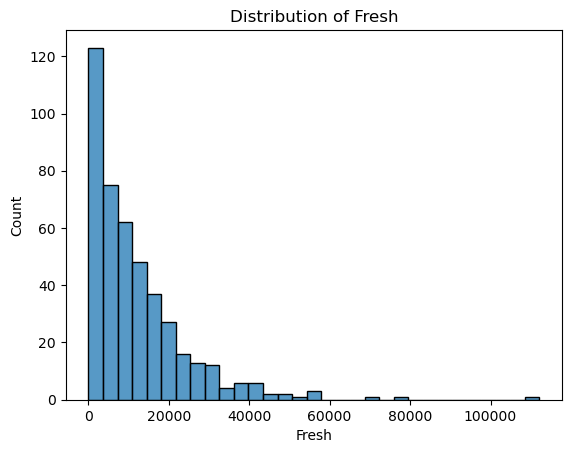

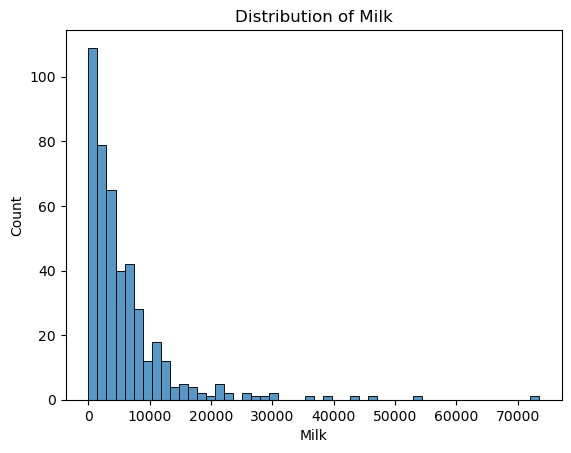

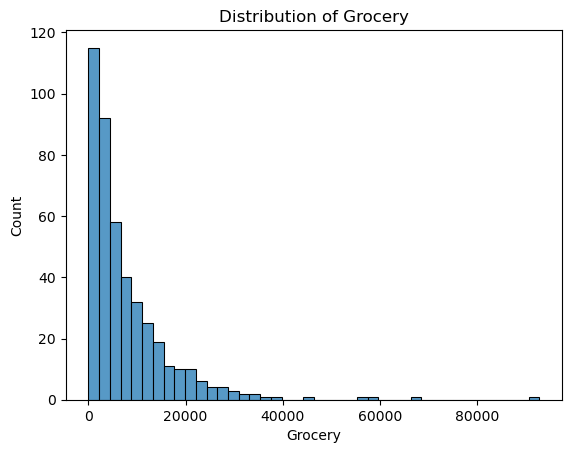

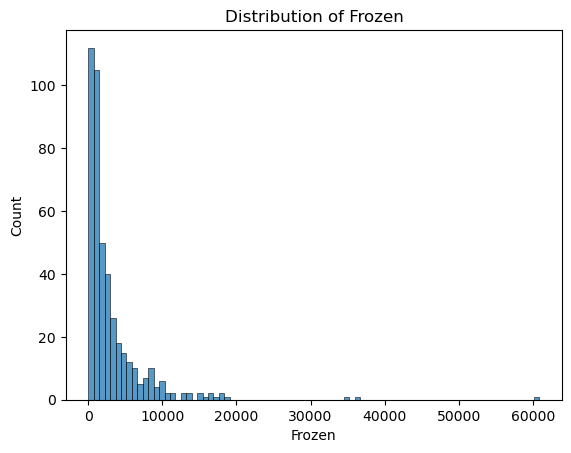

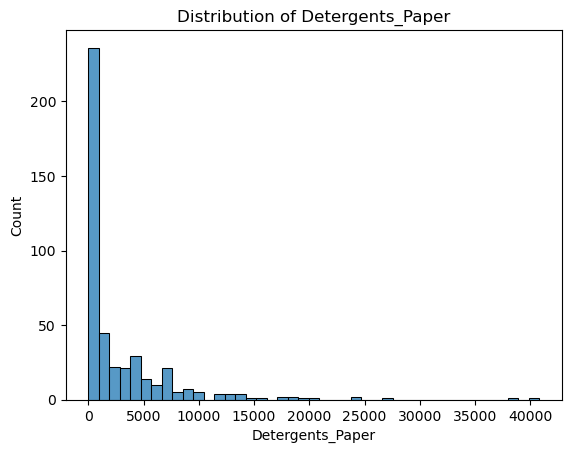

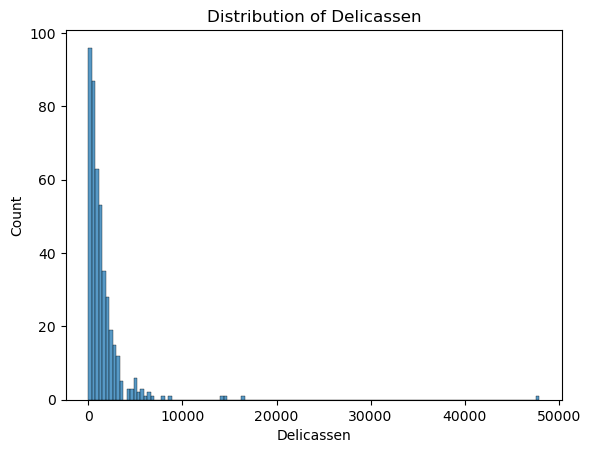

In [6]:
# Feature selection
selected_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
products = df[selected_features]

# Distribution of sold products
for column in products:
    plt.figure()
    sns.histplot(products[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [7]:
# Find outliers
from scipy.stats import zscore

z_scores = np.abs(zscore(products))
threshold = 3
outliers = np.where(z_scores > threshold)

# Remove outliers
products_no_outliers = products[(z_scores < threshold).all(axis=1)]

In [8]:
# Scale dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
products_final = pd.DataFrame(scaler.fit_transform(products_no_outliers), columns=selected_features)
products_final.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02
mean,-5.792468e-17,1.029772e-16,-6.865147e-17,2.574430e-17,-2.574430e-17,-8.581434e-17
std,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00
min,-1.091911e+00,-1.058627e+00,-1.056245e+00,-8.667220e-01,-7.396316e-01,-1.015635e+00
25%,-7.798750e-01,-7.459452e-01,-7.285642e-01,-6.429957e-01,-6.617023e-01,-6.932480e-01
50%,-2.724241e-01,-2.949172e-01,-3.545156e-01,-3.785920e-01,-4.996813e-01,-2.935533e-01
75%,5.042382e-01,4.475842e-01,4.572026e-01,2.246192e-01,4.016145e-01,3.649973e-01
max,3.910459e+00,4.613042e+00,4.338772e+00,4.932482e+00,4.601369e+00,5.432937e+00


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

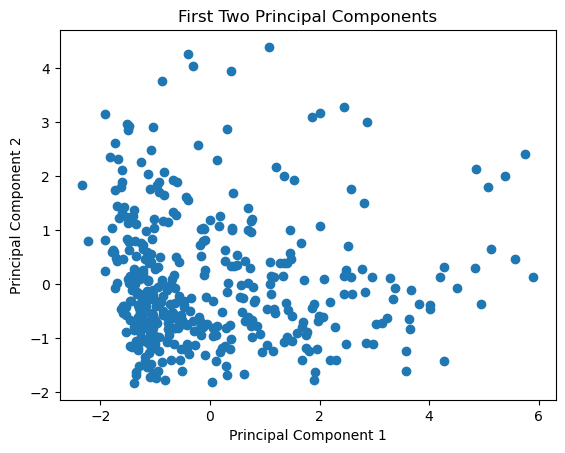

In [9]:
from sklearn.decomposition import PCA

# Use PCA to find first two principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(products_final)

# Add PCA labels to original dataframe
products_final['PCA1'] = pca_result[:, 0]
products_final['PCA2'] = pca_result[:, 1]

# Plot principal components
plt.scatter(products_final['PCA1'], products_final['PCA2'])
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

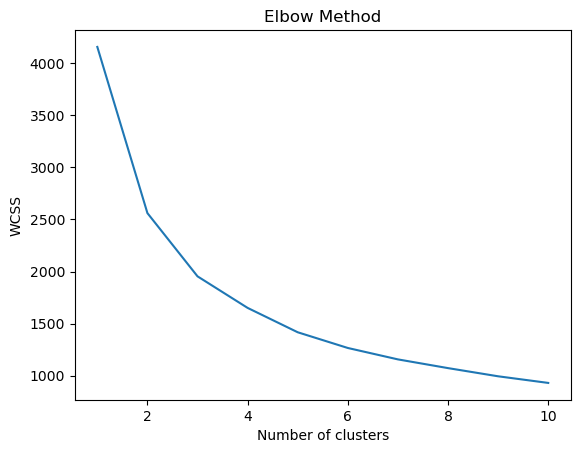

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(products_final)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [11]:
# Apply kmeans clustering with the optimal k-value
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0) # Experimented with n_clusters
cluster_labels = kmeans.fit_predict(products_final)

# Add the cluster labels to original dataframe
products_final['kmeans_Cluster'] = cluster_labels

# Obtain the centroids
centroids = kmeans.cluster_centers_

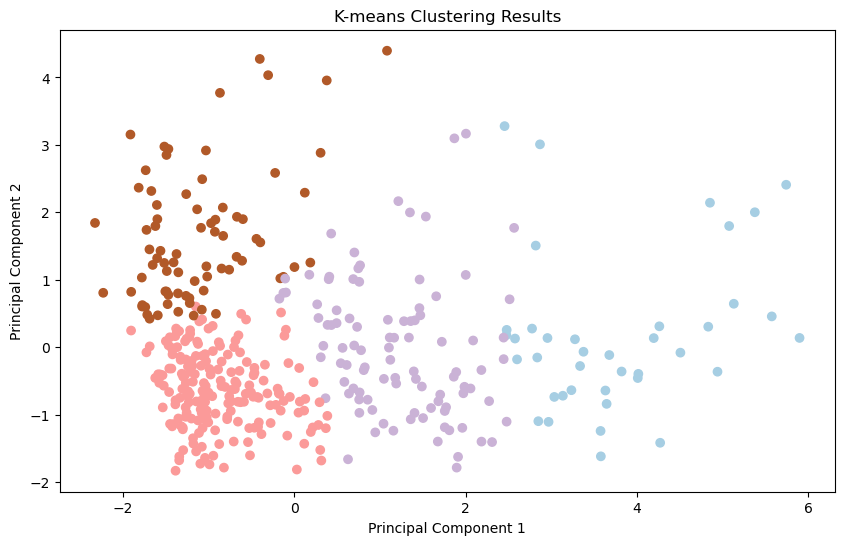

In [12]:
# Visualize the clusters using PCA for dimensionality reduction
plt.figure(figsize=(10, 6))
plt.scatter(products_final['PCA1'], products_final['PCA2'], c=products_final['kmeans_Cluster'], cmap='Paired', label='Data Points')
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')  # Plot centroids
plt.title('K-means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Part III - Hierarchical Clustering

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

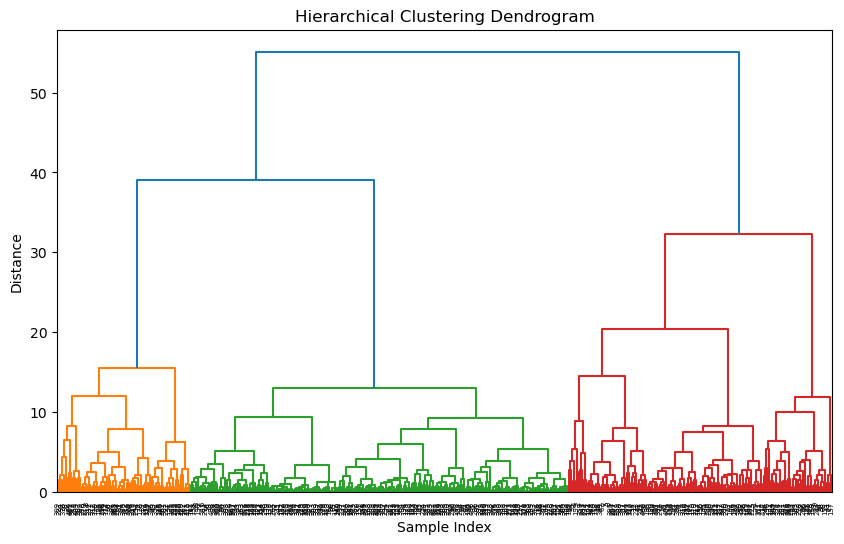

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply hierarchical clustering with Euclidean distance and Ward linkage
linkage_matrix = linkage(products_final, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=products_final.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

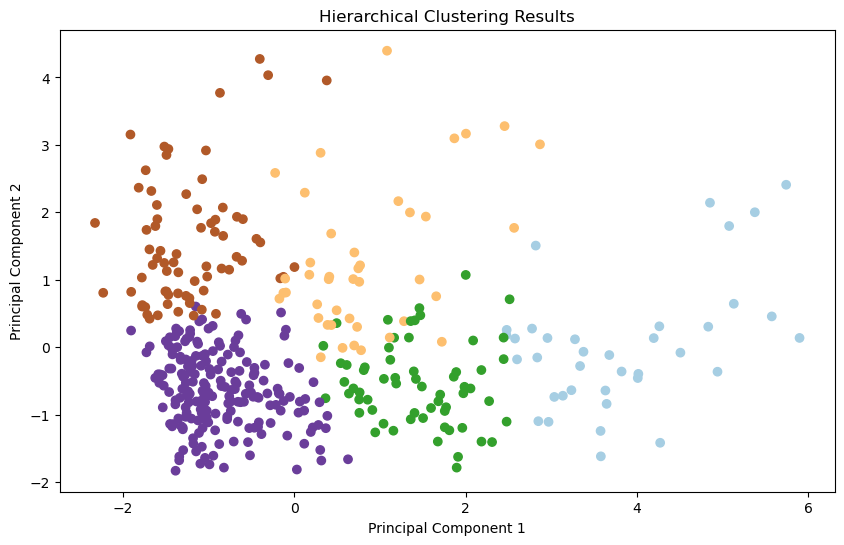

In [14]:
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(linkage_matrix, t=20, criterion='distance') # Distance criteria based on dendrogram and experimenting

# Add the cluster labels to original dataframe
products_final['hierarchy_Cluster'] = cluster_labels

# Scatter plot of the clusters using the original features
plt.figure(figsize=(10, 6))
plt.scatter(products_final['PCA1'], products_final['PCA2'], c=products_final['hierarchy_Cluster'], cmap='Paired')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [15]:
products_final

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,PCA1,PCA2,kmeans_Cluster,hierarchy_Cluster
0,0.199569,1.051409,0.115837,-0.801844,0.093798,0.082291,0.778087,-0.046002,2,3
1,-0.372655,1.085254,0.427079,-0.270462,0.286944,0.442510,1.164348,0.139578,2,2
2,-0.444438,0.865042,0.134911,-0.049739,0.356526,5.432937,1.867347,3.096672,2,3
3,0.260340,-0.807866,-0.402125,1.322997,-0.582369,0.452379,-1.164357,0.979452,3,5
4,1.213706,0.118255,0.059543,0.468598,-0.186092,3.246130,0.305642,2.882283,3,3
...,...,...,...,...,...,...,...,...,...,...
409,1.936429,1.577764,1.428729,3.633548,-0.683778,0.794505,0.377256,3.955680,3,5
410,2.907639,-0.756220,-0.938230,0.672844,-0.711549,0.911288,-1.817972,2.364678,3,5
411,0.389426,2.333122,3.633321,-0.725295,3.890255,0.517350,5.572942,0.455845,0,1
412,-0.043004,-0.635345,-0.710575,-0.518989,-0.688147,0.729534,-0.867864,0.018267,1,4


In [16]:
# 1. Grocery products and Paper products & Detergents have a very high correlation (0.92). They are often sold in similar monetary amounts to clients.

# 2. There are a few outlier clients that purchase in massively higher amounts, which should not be considered when searching for trends or models in the data
#    as they do not represent the average client.

# 3. Despite there being 6 product types, the models cluster effectively in fewer amounts than that. Based on the correlation prior, 
#    Grocery products and Paper products & Detergents are probably often considered together. Grocery and Milk purchase amounts also have a
#    relevant correlation (0.73).

# 4. Overall, it seems certain product types can be further grouped (like how Paper products & Detergents are) for further analysis or business applications.

# challenges
#context of dataset, and subsequently model/visual results
#track final dataset such that original features included
# Hyperparams